# Solutions to chapter 8 applied exercises

In [106]:
import pandas as pd
import numpy as np
from IPython.display import display
from ISLP import load_data
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Question7

In [107]:
boston = load_data('Boston')
display(boston.head())


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [108]:
X_train, X_test, y_train, y_test = train_test_split(boston.drop(columns=['crim']), boston['crim'], test_size=0.5, random_state=1)

In [109]:
results = pd.DataFrame()
results["n_estimators"] =  np.concatenate(
    [
        range(1, 501, 10),
        range(1, 501, 10),
        range(1, 501, 10)
    ]
)
results["error"] = np.inf
results["max_features"] = np.concatenate(
    [
        np.repeat(12, 50),
        np.repeat(6, 50),
        np.repeat(3, 50),
    ]
)
display(results.sample(10))

,n_estimators,error,max_features
109,91,inf,3
94,441,inf,6
63,131,inf,6
78,281,inf,6
7,71,inf,12
90,401,inf,6
9,91,inf,12
84,341,inf,6
44,441,inf,12
80,301,inf,6


In [110]:
for index, row in results.iterrows():
    model = RandomForestRegressor(n_estimators=int(row['n_estimators']), max_features=int(row['max_features']))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.loc[index, 'mse'] = mean_squared_error(y_test, y_pred)

In [111]:
display(results)

,n_estimators,error,max_features,mse
0,1,inf,12,95.350639
1,11,inf,12,38.582483
2,21,inf,12,29.809125
3,31,inf,12,27.379085
4,41,inf,12,32.915718
...,...,...,...,...
145,451,inf,3,30.165576
146,461,inf,3,30.782576
147,471,inf,3,31.520875
148,481,inf,3,32.128824


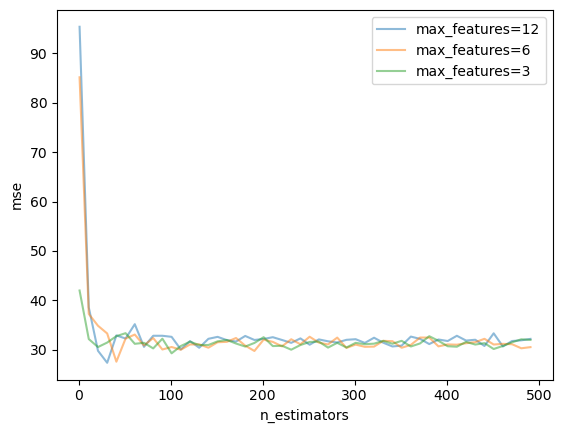

In [112]:
for max_features in results['max_features'].unique():
    subset = results[results['max_features'] == max_features]
    plt.plot(subset['n_estimators'], subset['mse'], label=f'max_features={max_features}', alpha=0.5, )
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('mse')
plt.show()
